In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize' : (12, 5)}, font='verdana')
from scipy import special
plt.style.use('dark_background')

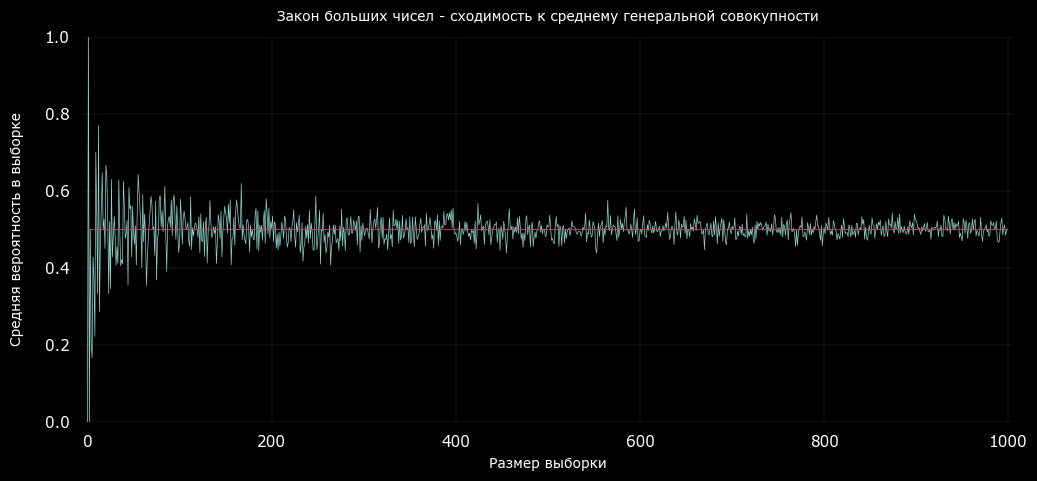

In [2]:
t = pd.Series([np.random.binomial(1,0.5,n).mean() for n in range(1, 1001)])

plt.plot(t.index, t.values, linewidth=0.5)
plt.plot(t.index, np.array([0.5]*1000), '-r',linewidth=0.6)
plt.title('Закон больших чисел - сходимость к среднему генеральной совокупности', fontsize=10, y=1.02)
plt.xlabel("Размер выборки", labelpad = 5, fontsize= 10)
plt.ylabel('Средняя вероятность в выборке', labelpad = 15, fontsize= 10)
plt.ylim(0, 1)
plt.xlim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 
plt.show()

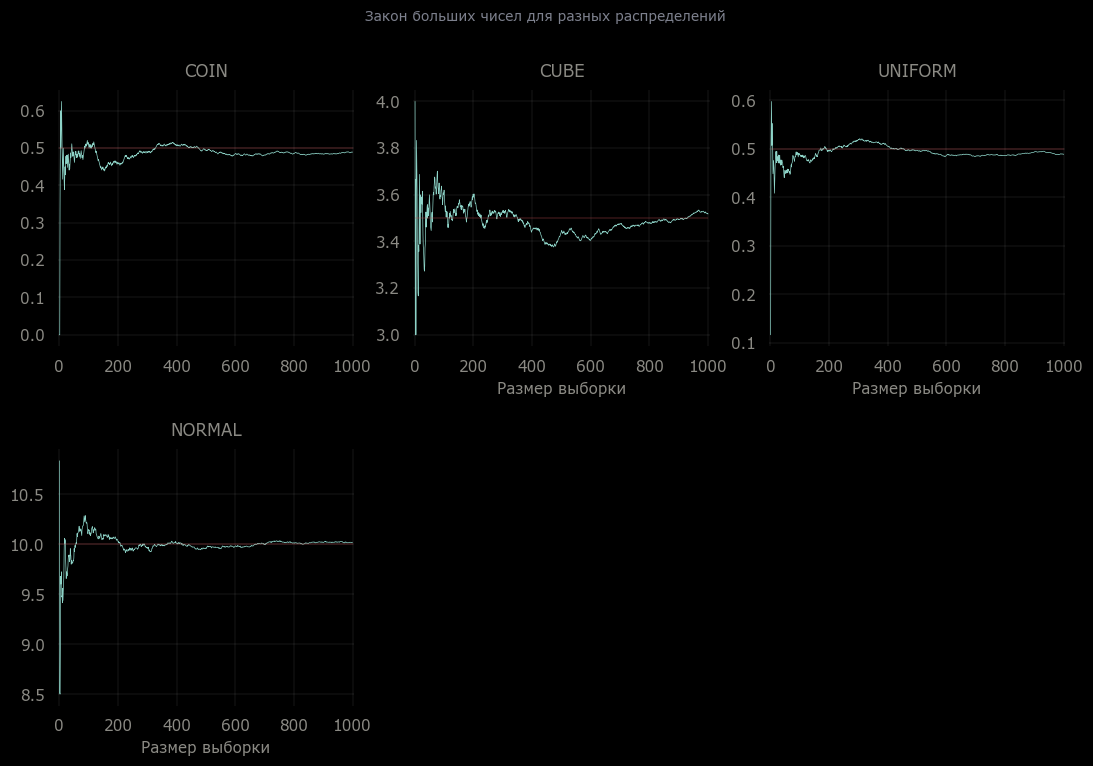

In [50]:
plt.figure(figsize=(13,8))
plt.subplots_adjust(wspace= 0.2, 
                    hspace= 0.4)


plt.suptitle('Закон больших чисел для разных распределений', fontsize=10, color='#7d808d')

plt.subplot(2, 3, 1)
t1 = pd.Series(np.random.binomial(1,0.5,1000)).to_frame()
t1.columns=['res']
t1['csum']=t1['res'].cumsum()
t1['num']=range(1,1001)
t1['cmean']=t1.csum/t1.num

plt.plot(t1.num, t1.cmean, linewidth=0.5)
plt.plot(t1.num, np.array([0.5]*1000), '-r',linewidth=0.3)
plt.title('COIN', fontsize=12, y=1.02, color='#8b8a84')
plt.tick_params(axis='both', colors='#8b8a84')
plt.xlim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(2, 3, 2)
t1 = pd.Series(np.random.randint(1,7,1000)).to_frame()
t1.columns=['res']
t1['csum']=t1['res'].cumsum()
t1['num']=range(1,1001)
t1['cmean']=t1.csum/t1.num
plt.plot(t1.num, t1.cmean, linewidth=0.5)
plt.plot(t1.num, np.array([3.5]*1000), '-r',linewidth=0.3)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('CUBE', fontsize=12, y=1.02,color='#8b8a84')
plt.xlabel("Размер выборки", labelpad = 5, fontsize= 11,color='#8b8a84')
plt.xlim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(2, 3, 3)
t1 = pd.Series(np.random.uniform(size = 1000)).to_frame()
t1.columns=['res']
t1['csum']=t1['res'].cumsum()
t1['num']=range(1,1001)
t1['cmean']=t1.csum/t1.num
plt.plot(t1.num, t1.cmean, linewidth=0.5)
plt.plot(t1.num, np.array([0.5]*1000), '-r',linewidth=0.3)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('UNIFORM', fontsize=12, y=1.02,color='#8b8a84')
plt.xlabel("Размер выборки", labelpad = 5, fontsize= 11,color='#8b8a84')
plt.xlim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(2, 3, 4)
t1 = pd.Series(np.random.normal(10,2,size = 1000)).to_frame()
t1.columns=['res']
t1['csum']=t1['res'].cumsum()
t1['num']=range(1,1001)
t1['cmean']=t1.csum/t1.num

plt.plot(t1.num, t1.cmean, linewidth=0.5)
plt.plot(t1.num, np.array([10]*1000), '-r',linewidth=0.3)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('NORMAL', fontsize=12, y=1.02, color='#8b8a84')
plt.xlabel("Размер выборки", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 


plt.show()

Центральная предельная теорема: средние выборок распределены нормально, среднее средних сходится к среднему генеральной совокупности, а стандартная ошибка много меньше стандартного отклонения 

In [45]:
p = np.random.normal(100,10,100000)

print(f'среднее распределения:                {p.mean()} \n\
стандартное отклонение распределения: {p.std()}')

среднее распределения:                100.02547478370685 
стандартное отклонение распределения: 9.982354374407262


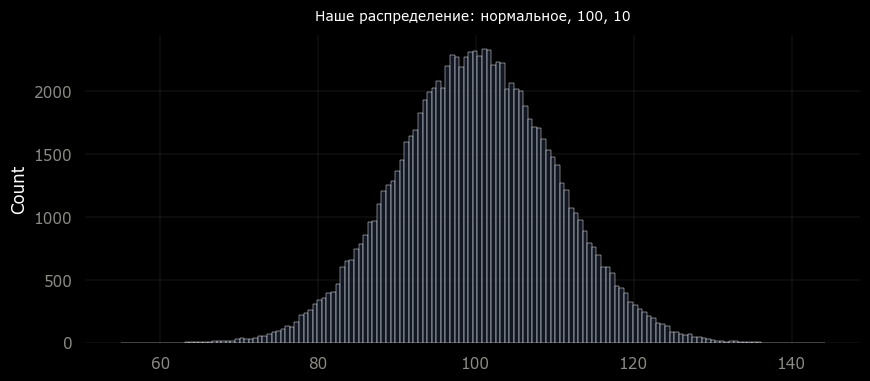

In [46]:
plt.figure(figsize=(10,4))
plt.tick_params(axis='both', colors='#8b8a84')
sns.histplot(p, color='#171e2f')
plt.title('Наше распределение: нормальное, 100, 10', fontsize=10, y=1.02)

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)

Наберем из распределения средние 10000 выборок по 30 наблюдений

In [47]:
p_samples_means = pd.Series([np.random.choice(p, 30, False).mean() for _ in range(10000)])
print(f'среднее распределения средних выборок:                          {p_samples_means.mean()} \n\
стандартное отклонение распределения средних выборок:           {p_samples_means.std()}\n\
расчетное стандартное отклонение распределения средних выборок: {p.std()/(30**0.5)}    ')


среднее распределения средних выборок:                          100.01590833733839 
стандартное отклонение распределения средних выборок:           1.8112850775017828
расчетное стандартное отклонение распределения средних выборок: 1.8225202226244093    


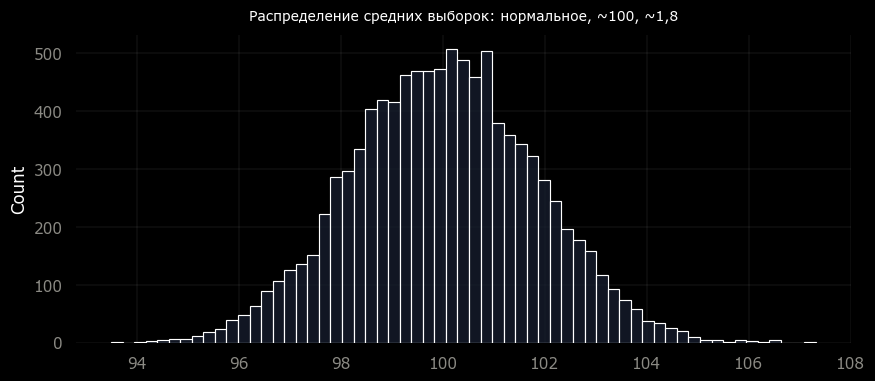

In [48]:
plt.figure(figsize=(10,4))
plt.tick_params(axis='both', colors='#8b8a84')
sns.histplot(p_samples_means, color='#171e2f')
plt.title('Распределение средних выборок: нормальное, ~100, ~1,8', fontsize=10, y=1.02)

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)

То есть, значения в распределении у нас разбросаны вокруг 100 от 60 до 140, а средние выборок по 30 наблюдений разбросаны вокруг 100 от 94 до 106

In [61]:
t6 = np.random.normal(100,10,size = 100000)
t_se_sample = [np.random.choice(t6, n, False).std() for _ in range(1, 100)] #отклонение выборки
print(f'стандартное отклонение в распределении    {t6.std()}\n\
среднее стандартное отклонение в выборке  {pd.Series(t_se_sample).mean()}')

стандартное отклонение в распределении    9.96073829404086
среднее стандартное отклонение в выборке  9.61551183928037


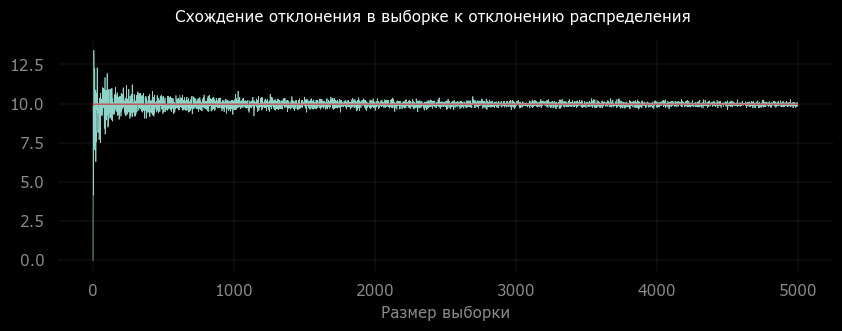

In [62]:
t_se_sample = pd.Series([np.random.choice(t6, n, False).std() for n in range(1, 5001)])

plt.figure(figsize=(10,3))

plt.suptitle('Схождение отклонения в выборке к отклонению распределения', fontsize=11)

plt.plot(t_se_sample.index, t_se_sample.values, linewidth=0.5)
plt.plot(t_se_sample.index, np.array([t6.std()]*5000), '-r',linewidth=1)
plt.tick_params(axis='both', colors='#8b8a84')
plt.xlabel("Размер выборки", labelpad = 5, fontsize= 11, color='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 
plt.show()

С увеличением размера выборки ее стандартное отклонение сходится к отклонению всего распределения, а значит можно пробовть считать доверительный интервал выборки через ее стандартное отклонение

In [77]:
smpl = np.random.choice(t6, 50, False)
print(f'среднее распределения лежит между   {round(smpl.mean() - 2*smpl.std()/(50**0.5),2)} и {round(smpl.mean() + 2*smpl.std()/(50**0.5),2)} \n\
реальное среднее распределения      {round(t6.mean(), 2)}')

среднее распределения лежит между   96.57 и 102.9 
реальное среднее распределения      100.01


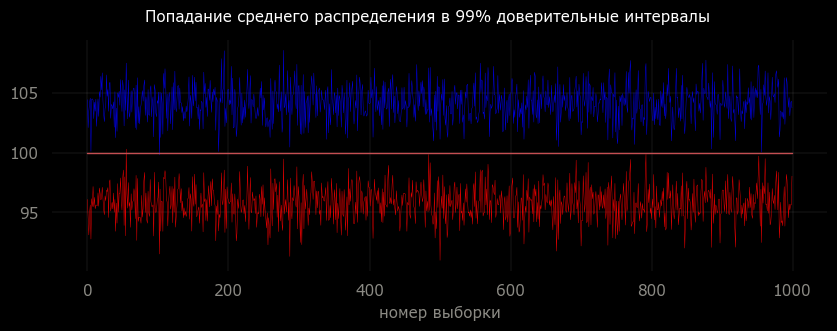

In [96]:
lft = []
rght = []
for _ in range(1, 1001):
    smpl = np.random.choice(t6, 50, False)
    lft.append(smpl.mean() - 3*smpl.std()/(50**0.5))
    rght.append(smpl.mean() + 3*smpl.std()/(50**0.5))

plt.figure(figsize=(10,3))

plt.suptitle('Попадание среднего распределения в 99% доверительные интервалы', fontsize=11)

plt.plot(pd.Series(lft).index, pd.Series(lft).values, linewidth=0.3, color = ('red'))
plt.plot(pd.Series(rght).index, pd.Series(rght).values, linewidth=0.3, color = 'blue')
plt.plot(pd.Series(lft).index, np.array([t6.mean()]*1000), '-r',linewidth=1)
plt.tick_params(axis='both', colors='#8b8a84')
plt.xlabel("номер выборки", labelpad = 5, fontsize= 11, color='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 
plt.show()

Резюмируем здесь:

- У нас было нормальное распределение с средним 100 и с разбросом, грубо от 60 до 140

- Из этого распределения мы взяли выборку и через ее среднее, стандартное отклонение и размер расчитали доверительные интервалы в которых с 99% вероятностью находится среднее всей последовательности

- При этом интервал получился, грубо, от 94 до 106

Нормализация распределений через z-score (мы знаем среднее и стандартное отклонение распределения - и используем их)

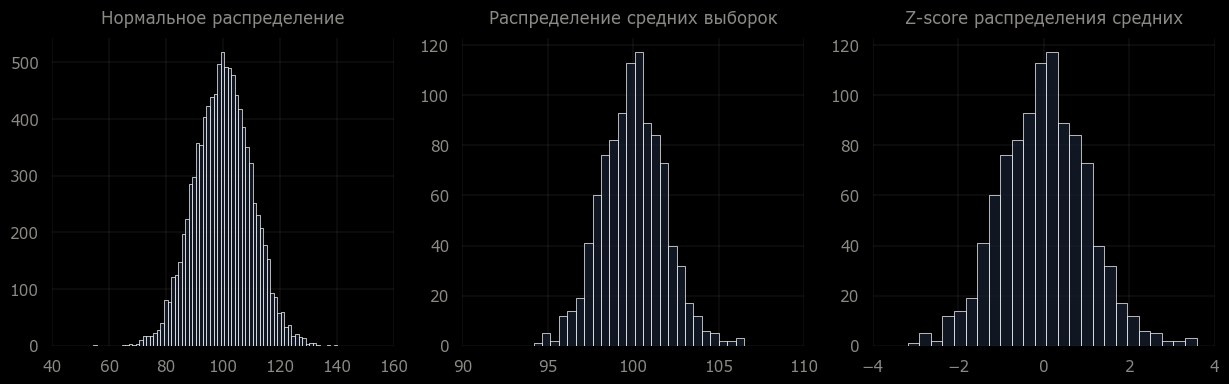

In [13]:
nd = np.random.normal(100,10,10000)
z_smpls=[]
smpls = []
for _ in range(1000):
    s = np.random.choice(nd, 30, False).mean()
    smpls.append(s)
    z_smpls.append((s-nd.mean()) / (nd.std()/(30**0.5)))

plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace= 0.2, 
                    hspace= 0.4)

plt.subplot(1, 3, 1)
sns.histplot(nd, linewidth=0.5,color='#171e2f')
plt.title('Нормальное распределение', fontsize=12, y=1.02, color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlim(40, 160)
#plt.ylim(-5, 1005)
plt.tick_params(axis='both', colors='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(1, 3, 2)
sns.histplot(smpls, linewidth=0.5,color='#171e2f')
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('Распределение средних выборок', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlim(90, 110)
#plt.ylim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(1, 3, 3)
sns.histplot(z_smpls, linewidth=0.5,color='#171e2f')
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('Z-score распределения средних', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlim(-4, 4)
#plt.ylim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.show()


Нормализация распределений через t-score (мы знаем среднее, но не знаем стандартное отклонение распределения, используем среднее распределение и стандартное отклонение выборки)

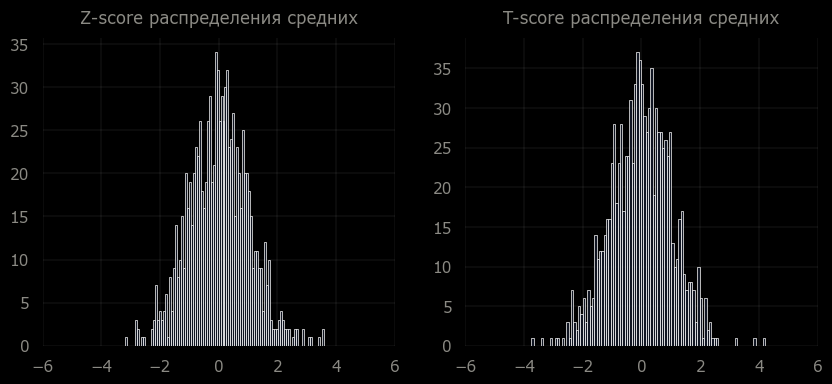

In [27]:
t_score_smpls=[]
smpls = []
for _ in range(1000):
    s = np.random.choice(nd, 30, False)
    smpls.append(s.mean())
    t_score_smpls.append((s.mean()-nd.mean()) / (s.std()/(30**0.5)))

plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace= 0.2, 
                    hspace= 0.4)

plt.subplot(1, 2, 1)
sns.histplot(z_smpls, linewidth=0.5,color='#171e2f',bins = 100)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('Z-score распределения средних', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlim(-6, 6)
#plt.ylim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(1, 2, 2)
sns.histplot(t_score_smpls, linewidth=0.5,color='#171e2f', bins = 100)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('T-score распределения средних', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlim(-6, 6)
#plt.ylim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.show()


Из-за того, что в конктреной выборке отклоенние может быть довольно сильно больше или меньше отклоонения распределения - меняется значменатель в большую и меньшую сторону и T-score начинает сильнее разбрасывать по оси х чем z-score.

Чем меньше выборка, тем сильнее отклонение выборки может отличаться от распределения, тем больше разброс и т-распеределение все сильнее перестает быть нормальным

Сравним z- и t-score для выборки размером 5 вместо 30

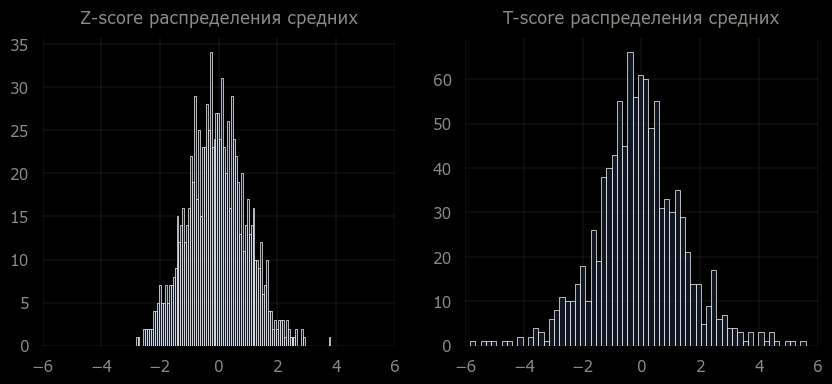

In [29]:
t_score_smpls=[]
smpls = []
z_smpls = []
for _ in range(1000):
    s = np.random.choice(nd, 5, False)
    smpls.append(s.mean())
    t_score_smpls.append((s.mean()-nd.mean()) / (s.std()/(5**0.5)))
    z_smpls.append((s.mean()-nd.mean()) / (nd.std()/(5**0.5)))

plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace= 0.2, 
                    hspace= 0.4)

plt.subplot(1, 2, 1)
sns.histplot(z_smpls, linewidth=0.5,color='#171e2f',bins = 100)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('Z-score распределения средних', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlim(-6, 6)
#plt.ylim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(1, 2, 2)
sns.histplot(t_score_smpls, linewidth=0.5,color='#171e2f', bins = 100)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('T-score распределения средних', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlim(-6, 6)
#plt.ylim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.show()

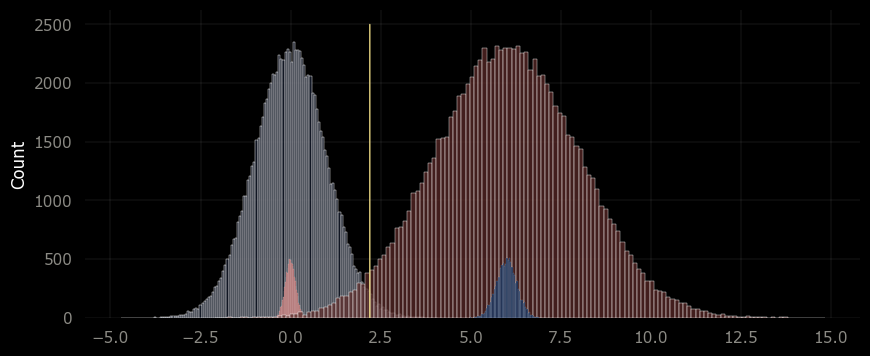

In [97]:
t2 = np.random.normal(size = 100000)
t3 = np.random.normal(6,2,size = 100000)
t_se = [pd.Series(np.random.normal(size = 50)).mean() for _ in range(10000)]
t_se1 = [pd.Series(np.random.normal(6,2,size = 50)).mean() for _ in range(10000)]
plt.figure(figsize=(10,4))
plt.tick_params(axis='both', colors='#8b8a84')
sns.histplot(t2, color='#171e2f')
sns.histplot(t_se, color='#ba5a58')
sns.histplot(t3, color='#592927')
sns.histplot(t_se1, color='#042758')
plt.plot(np.array([2.2]*2500), np.array(range(2500)), linewidth=1, color='#e5d380')

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)


То есть если мы берем среднее выборки, то среднее самой совокупности с вероятностью 99% будет на расстоянии трех стандартных ошибок выборки в обе стороны. Другими словами случайная выборка существенно повышает точность обнаружения среднего совокупности по сравнению со значением. Причем увеличение размера выборки повышает точность, уменьшая стандартную ошибку